In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# WHAT ARE THE DIFFERENCES BETWEEN PCA and Autoencoders

if the cost function is MSE and the autoencoder uses only linear activations it will perform a PCA.

In [2]:
X, y = datasets.make_classification(n_samples=10000, n_features=50, n_redundant=10, n_informative=10,
                           random_state=1, n_clusters_per_class=2,n_classes=3, class_sep=2)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [4]:
X_tr.shape, X_valid.shape, X_test.shape

((5600, 50), (1400, 50), (3000, 50))

In [5]:
sc = StandardScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

In [6]:
train_df = pd.DataFrame(X_train)
train_df['class'] = y_train

<AxesSubplot:>

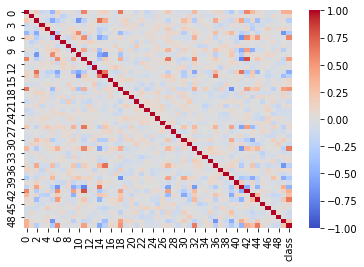

In [7]:
sns.heatmap(train_df.sample(200).corr(), vmin=-1, vmax=1, cmap='coolwarm')

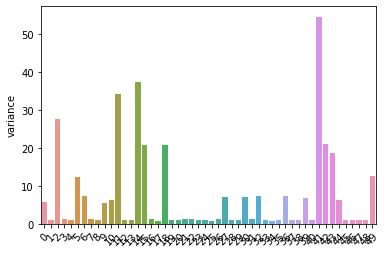

In [8]:
sns.barplot(x=list(train_df.drop('class',1)), y=train_df.drop('class',1).sample(200).var())
plt.ylabel('variance')
plt.xticks(rotation=45);

# a Undercomplete Linear AE

In [9]:
encoder = keras.models.Sequential([
    keras.layers.Dense(5, input_shape=[50]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=[5]),
])

autoencoder = keras.models.Sequential([encoder, decoder])

In [10]:
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 5)                 255       
_________________________________________________________________
sequential_1 (Sequential)    (None, 50)                300       
Total params: 555
Trainable params: 555
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = autoencoder.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
175/175 [==============================] - 2s 7ms/step - loss: 1.0620 - val_loss: 0.8221
Epoch 2/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7889 - val_loss: 0.7333
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7268 - val_loss: 0.7106
Epoch 4/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7072 - val_loss: 0.7005
Epoch 5/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7005 - val_loss: 0.6937
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 0.6953 - val_loss: 0.6887
Epoch 7/100
175/175 [==============================] - 0s 1ms/step - loss: 0.6842 - val_loss: 0.6860
Epoch 8/100
175/175 [==============================] - 0s 1ms/step - loss: 0.6902 - val_loss: 0.6835
Epoch 9/100
175/175 [==============================] - 0s 1ms/step - loss: 0.6855 - val_loss: 0.6821
Epoch 10/100
175/175 [==============================] - 0s 1ms/step - loss: 0.6866 - val_lo

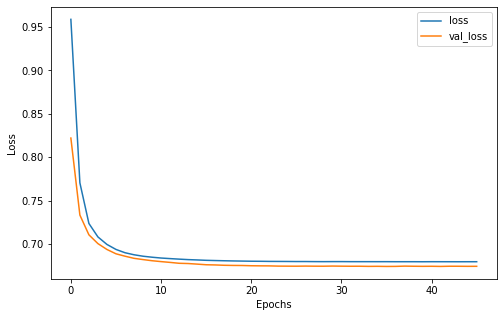

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

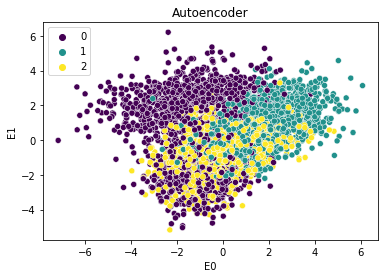

In [13]:
codings = encoder.predict(X_tr_std)
sns.scatterplot(x=codings[:,0], y=codings[:,1], hue=y_tr, palette='viridis')
plt.xlabel(f'E0')
plt.ylabel(f'E1')
plt.title(f'Autoencoder');

## SKLEARN PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=5,svd_solver='auto')
scores = pca.fit_transform(X_tr_std) # u

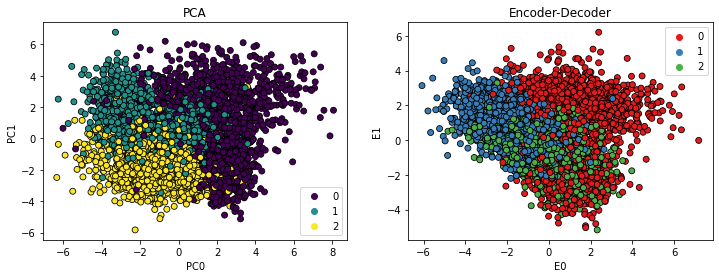

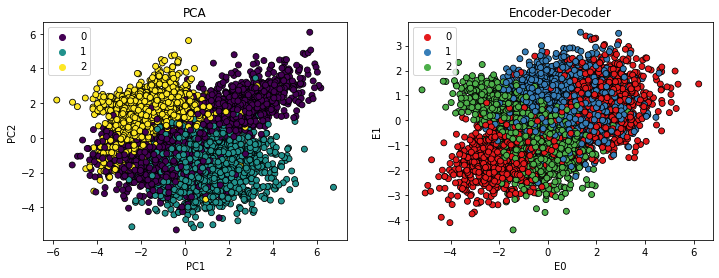

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-codings[:,0], y=codings[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=codings[:,1], y=codings[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('Encoder-Decoder')
plt.xlabel('E0')
plt.ylabel('E1');

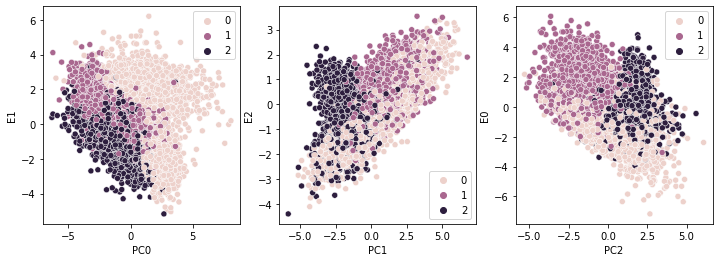

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x=scores[:,0], y=codings[:,1], hue=y_tr)
plt.xlabel('PC0')
plt.ylabel('E1')
plt.subplot(1,3,2)
sns.scatterplot(x=scores[:,1], y=codings[:,2], hue=y_tr)
plt.xlabel('PC1')
plt.ylabel('E2')
plt.subplot(1,3,3)
sns.scatterplot(x=scores[:,2], y=codings[:,0], hue=y_tr)
plt.xlabel('PC2')
plt.ylabel('E0');

In [41]:
codings_train = encoder.predict(X_tr_std)
codings_test = encoder.predict(X_test_std)
scores_train = pca.transform(X_tr_std)
scores_test = pca.transform(X_test_std)

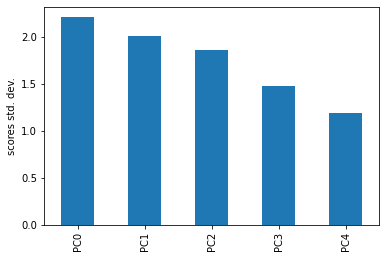

In [42]:
pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).std().plot(kind='bar', color='tab:blue')
plt.ylabel('scores std. dev.');

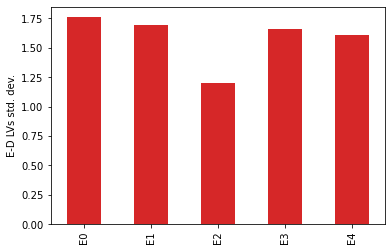

In [43]:
pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(pca.n_components_)]).std().plot(kind='bar', color='tab:red')
plt.ylabel('E-D LVs std. dev.');

<AxesSubplot:>

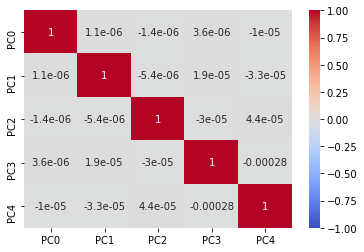

In [44]:
sns.heatmap(pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

<AxesSubplot:>

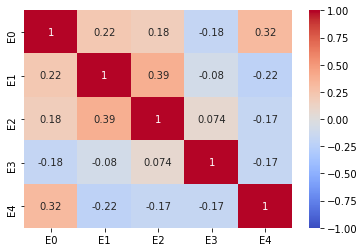

In [45]:
sns.heatmap(pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

# Predictions

In [46]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [47]:
# X_tr_std = sc.fit_transform(X_tr)
# X_valid_std = sc.transform(X_valid)
# X_test_std = sc.transform(X_test)
lrc = LogisticRegressionCV(max_iter=2000)
lrc.fit(X_tr_std,y_tr)
lrc.score(X_tr_std,y_tr),lrc.score(X_test_std,y_test)

(0.9673214285714286, 0.9693333333333334)

In [48]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(X_tr_std,y_tr)
rfc.score(X_tr_std,y_tr), rfc.score(X_test_std,y_test)

(0.9767857142857143, 0.9736666666666667)

In [49]:
lrc = LogisticRegressionCV(max_iter=1000)
lrc.fit(codings_train,y_tr)
lrc.score(codings_train,y_tr),lrc.score(codings_test,y_test)

(0.9292857142857143, 0.933)

In [50]:
lrc = LogisticRegressionCV(max_iter=1000)
lrc.fit(scores_train,y_tr)
lrc.score(scores_train,y_tr),lrc.score(scores_test,y_test)

(0.9285714285714286, 0.9296666666666666)

In [51]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(scores_train,y_tr)
rfc.score(scores_train,y_tr), rfc.score(scores_test,y_test)

(0.9551785714285714, 0.9493333333333334)

In [52]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(codings_train,y_tr)
rfc.score(codings_train,y_tr), rfc.score(codings_test,y_test)

(0.9458928571428571, 0.9493333333333334)

In [59]:
labels = ['Original', 'PCA','AE']
modelscores = pd.DataFrame(columns=labels)
modelscores['PCA'] = cross_val_score(rfc, scores_train, y_tr, cv=5)
modelscores['AE'] = cross_val_score(rfc, codings_train, y_tr, cv=5)

modelscores['Original'] = cross_val_score(rfc, X_tr_std, y_tr, cv=5)
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.9,1)

# STACKED ENCODER-DECODER

In [61]:
# X_tr_std = sc.fit_transform(X_tr)
# X_valid_std = sc.transform(X_valid)
# X_test_std = sc.transform(X_test)

In [77]:
st_encoder = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=[50]),
    keras.layers.Dense(15),
    keras.layers.Dense(5),
])

st_decoder = keras.models.Sequential([
    keras.layers.Dense(15, input_shape=[5]),
    keras.layers.Dense(20),
    keras.layers.Dense(50),
])

st_autoencoder = keras.models.Sequential([st_encoder, st_decoder])
st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
st_autoencoder.summary()
history = st_autoencoder.fit(X_tr_std,X_tr_std, epochs=500,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=30)],verbose=1)

st_codings_train = st_encoder.predict(X_tr_std)
st_codings_test = st_encoder.predict(X_test_std)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_15 (Sequential)   (None, 5)                 1415      
_________________________________________________________________
sequential_16 (Sequential)   (None, 50)                1460      
Total params: 2,875
Trainable params: 2,875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
175/175 [==============================] - 1s 2ms/step - loss: 0.9744 - val_loss: 0.7980
Epoch 2/500
175/175 [==============================] - 0s 1ms/step - loss: 0.7758 - val_loss: 0.7311
Epoch 3/500
175/175 [==============================] - 0s 1ms/step - loss: 0.7219 - val_loss: 0.6994
Epoch 4/500
175/175 [==============================] - 0s 1ms/step - loss: 0.6999 - val_loss: 0.6888
Epoch 5/500
175/175 [==============================] - 0s 1ms/step - loss: 0.6955 - val_loss: 0.6839
Epoch 6/

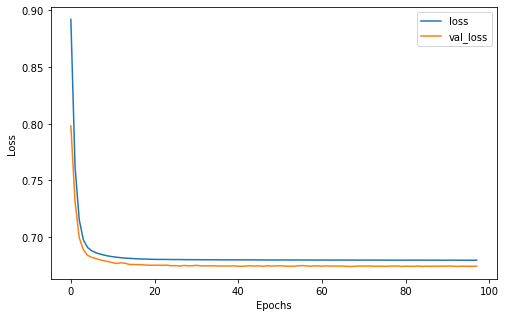

In [78]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

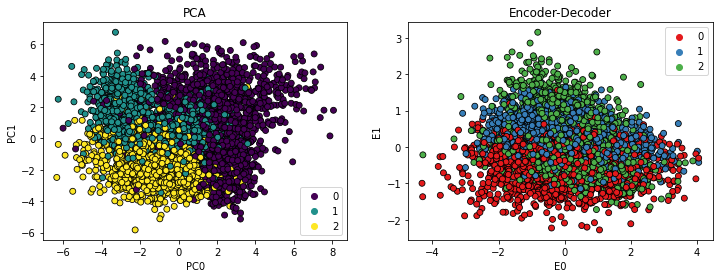

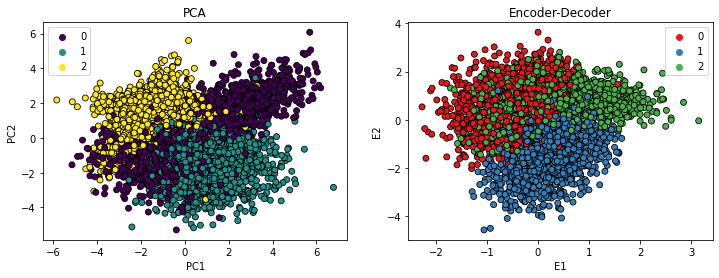

In [79]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores_train[:,0],y=scores_train[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-st_codings_train[:,0], y=st_codings_train[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores_train[:,1],y=scores_train[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=st_codings_train[:,1], y=st_codings_train[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('Encoder-Decoder')
plt.xlabel('E1')
plt.ylabel('E2');

In [80]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(st_codings_train,y_tr)
rfc.score(st_codings_train,y_tr), rfc.score(st_codings_test,y_test)

(0.9519642857142857, 0.945)

(0.9, 1.0)

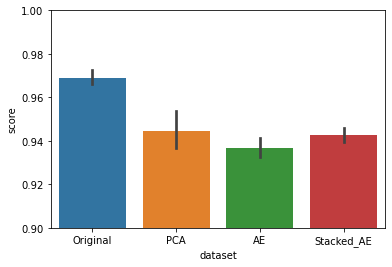

In [81]:
modelscores['Stacked_AE'] = cross_val_score(rfc, st_codings_train, y_tr, cv=5, n_jobs=-1)
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.9,1)

# Non linear ENCODER-DECODER

In [119]:
nl_st_encoder = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=[50], activation='relu'),
    keras.layers.Dense(15, activation='selu'),
    keras.layers.Dense(5, activation='selu'),
])

nl_st_decoder = keras.models.Sequential([
    keras.layers.Dense(15, input_shape=[5], activation='selu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(50, activation='relu'),
])

nl_st_autoencoder = keras.models.Sequential([nl_st_encoder, nl_st_decoder])
nl_st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1, decay=1e-4))
nl_st_autoencoder.summary()


history = nl_st_autoencoder.fit(X_tr_std,X_tr_std, epochs=500,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

nl_st_codings_train = nl_st_encoder.predict(X_tr_std)
nl_st_codings_test = nl_st_encoder.predict(X_test_std)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_39 (Sequential)   (None, 5)                 1415      
_________________________________________________________________
sequential_40 (Sequential)   (None, 50)                1460      
Total params: 2,875
Trainable params: 2,875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
175/175 [==============================] - 1s 3ms/step - loss: 0.9699 - val_loss: 0.8705
Epoch 2/500
175/175 [==============================] - 0s 1ms/step - loss: 0.8672 - val_loss: 0.8487
Epoch 3/500
175/175 [==============================] - 0s 1ms/step - loss: 0.8522 - val_loss: 0.8424
Epoch 4/500
175/175 [==============================] - 0s 1ms/step - loss: 0.8424 - val_loss: 0.8352
Epoch 5/500
175/175 [==============================] - 0s 1ms/step - loss: 0.8374 - val_loss: 0.8344
Epoch 6/

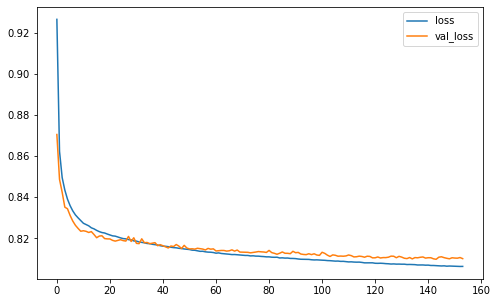

In [121]:
pd.DataFrame(history.history).plot(figsize=(8,5));

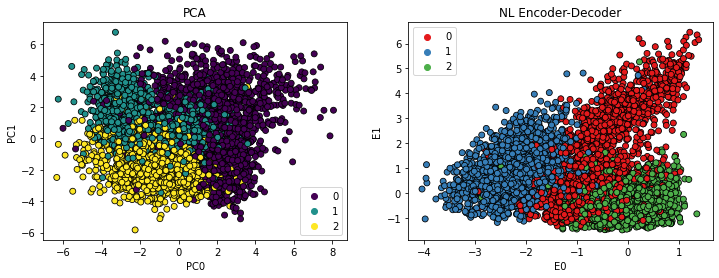

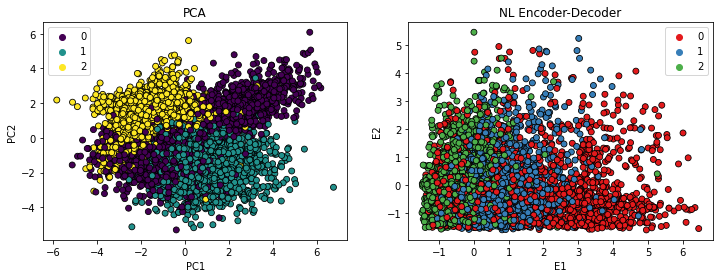

In [122]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-nl_st_codings_train[:,0], y=nl_st_codings_train[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('NL Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=nl_st_codings_train[:,1], y=nl_st_codings_train[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('NL Encoder-Decoder')
plt.xlabel('E1')
plt.ylabel('E2');

In [123]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(nl_st_codings_train,y_tr)
rfc.score(nl_st_codings_train,y_tr), rfc.score(nl_st_codings_test,y_test)

(0.9617857142857142, 0.9546666666666667)

(0.9, 1.0)

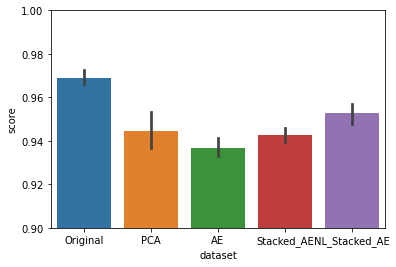

In [124]:
modelscores['NL_Stacked_AE'] = cross_val_score(rfc, nl_st_codings_train, y_tr, cv=5, n_jobs=-1)
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.9,1)

In [111]:
#sns.pairplot(pd.DataFrame(nl_st_codings_train, columns=['E-D'+str(i) for i in range(pca.n_components_)]))

<AxesSubplot:>

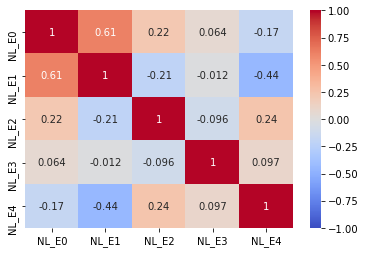

In [112]:
sns.heatmap(pd.DataFrame(nl_st_codings_train, columns=['NL_E'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

<AxesSubplot:>

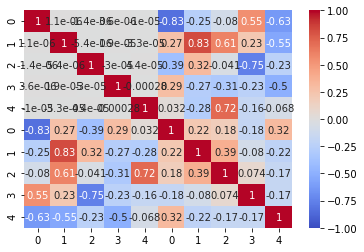

In [90]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(codings)],1).corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

<AxesSubplot:>

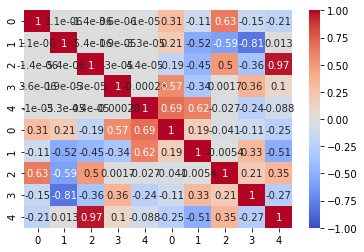

In [91]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(st_codings_train)],1).corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

<AxesSubplot:>

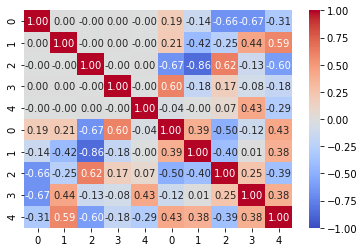

In [92]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(nl_st_codings_train)],1).corr(), 
            vmin=-1, vmax=1, cmap='coolwarm',annot=True, fmt='.2f')

In [125]:
pd.DataFrame(scores_train).cov()

,0,1,2,3,4
0,4.892189,0.000005,-0.000006,0.000012,-0.000026
1,0.000005,4.074115,-0.000020,0.000058,-0.000080
2,-0.000006,-0.000020,3.463142,-0.000083,0.000098
3,0.000012,0.000058,-0.000083,2.205437,-0.000488
4,-0.000026,-0.000080,0.000098,-0.000488,1.418300
